## 1. More on SDV

### (a) 

$$
A = USV^T
$$

$$
A = 
\left[
\begin{matrix}
u_{1}&...&u_{n}
\end{matrix}
\right]
\left[
\begin{matrix}
s_{1}& 0&...& 0\\
0& s_{2}&...&0\\
\vdots&\vdots&\ddots&\vdots\\
0&0&...&s_{n}
\end{matrix}
\right]
\left[
\begin{matrix}
v_{1}\\
\vdots\\
v_{n}
\end{matrix}
\right]
$$

Performing the first matrix multiplication:

$$
A = 
\left[
\begin{matrix}
u_{1}s_{1}&...&u_{n}s_{n}
\end{matrix}
\right]
\left[
\begin{matrix}
v_{1}\\
\vdots\\
v_{n}
\end{matrix}
\right]
$$

Performing the final multiplication, we get the desired form! 

$$
A = s_{1}u_{1}v_{1}^T + s_{2}u_{2}v_{2}^T + ... + s_{n}u_{n}v_{n}^T
$$

As a sum,

$$
A = \sum_{\alpha} s_{\alpha} u_{\alpha} v^T_{\alpha}
$$

where $s_{\alpha}$ are the diagonal components of matrix $S$ and $u_{\alpha}$ and $v_{\alpha}$ are vectors making up the columns of matrices $U$ and $V$, respectively. 

### (b) Construct matrix A

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

m=10; n=6
A = np.random.choice([0,1], size=m*n).reshape(m,n) 
print(A)

#component matrices
U, Sdiag, V_T = np.linalg.svd(A, full_matrices=False)

#diagonalize S
S = np.diag(Sdiag)

[[1 0 0 1 1 1]
 [1 1 0 0 0 1]
 [1 1 1 0 1 1]
 [0 0 0 0 0 0]
 [0 1 1 0 1 1]
 [0 1 0 0 1 0]
 [0 0 1 0 1 1]
 [1 0 0 0 0 0]
 [1 1 0 0 0 0]
 [0 1 1 0 1 0]]


<Figure size 640x480 with 0 Axes>

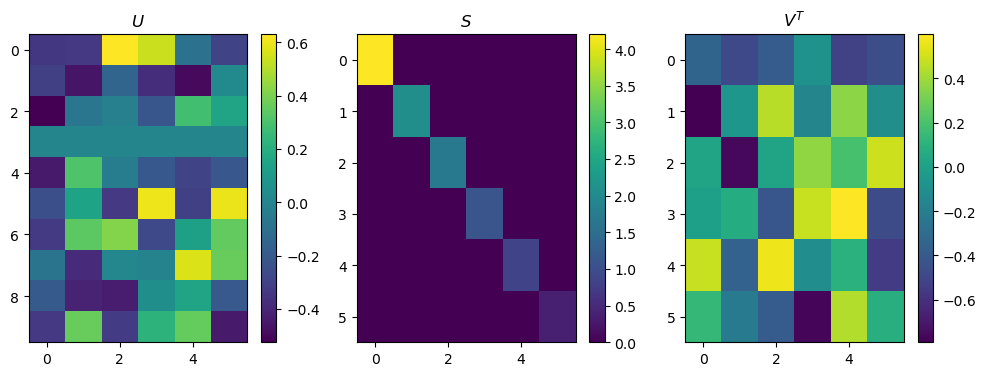

In [3]:
# plot color maps of component matrices

def plot_matrices(A, titles=[]):
    '''Visualize matrices as color maps
    
       I have used auto aspect so that matrices with vary small number of rows/columns 
       can still be displayed ''' 
    
    n = len(A) 
    if titles==[]:
        titles = [""]*n
    if n>4:
        nx = 4
    else:
        nx = n
    for j in range(int(np.floor(n/4))+1):        
        plt.clf()
        plt.figure(figsize=(nx*4,4))
        jmax = 4*(j+1)
        if jmax > n:
            jmax = n
        for i,AA in enumerate(A[4*j:jmax]):
            plt.subplot(1, nx, i+1)
            plt.imshow(AA, aspect='auto')
            plt.colorbar()
            plt.title(titles[4*j + i])
        plt.show()
        
        
plot_matrices([U, S, V_T], titles=[r"$U$", r"$S$", r"$V^T$"])

<Figure size 640x480 with 0 Axes>

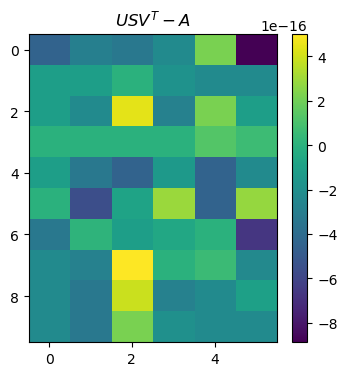

In [4]:
# compute sum
A_sum = U@S@V_T 

# If A_sum is really A, we should see that their difference is 0
plot_matrices([A_sum-A], titles=[r"$USV^T - A$"])

Since the difference between the matrices is approaching zero at all elements, we can confirm that it does return the original matrix!

### (c) Truncate sum 

Text(0, 0.5, 'Mean error')

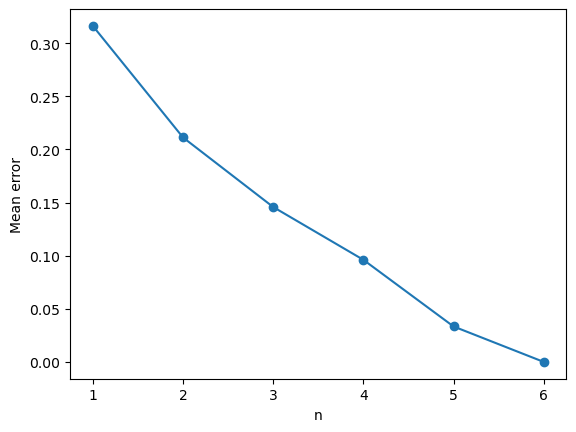

In [5]:
#as a function of n=6, calculate mean error
mean_error = []

#6 largest singular values
for n in range(1, 7):
    #truncate
    A_sum_trunc = U[:, :n]@S[:n, :n]@V_T[:n, :]
    error  = np.mean(np.abs(A - A_sum_trunc))
    mean_error.append(error)


#mean error
plt.plot(range(1,7), mean_error, marker='o')
plt.xlabel('n')
plt.ylabel('Mean error')

The error decreases as we use larger $n$ singular values to truncate matrices $U$ and $V$.

### (d) Try an image

262


<Figure size 640x480 with 0 Axes>

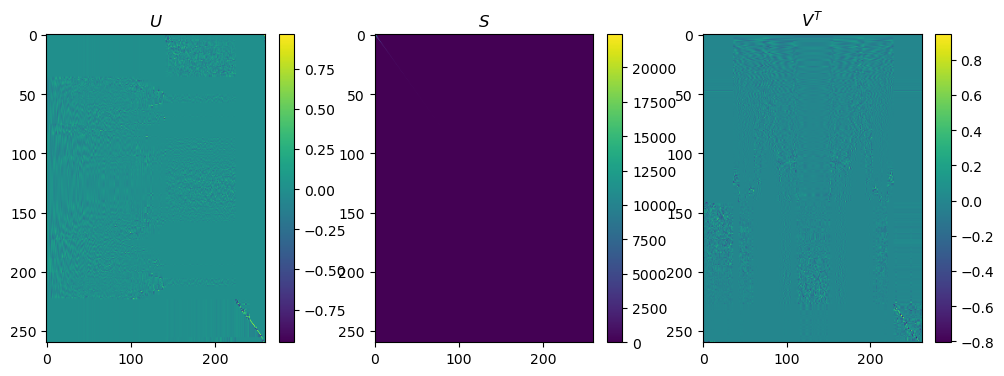

In [6]:
from PIL import Image
img = Image.open('github_logo.png')
A = np.asarray(img)[:,:,0]   # the last index selects the RG or B component
print(len(A[0]))
U, Sdiag, V_T = np.linalg.svd(A, full_matrices=False)
S = np.diag(Sdiag)

plot_matrices([U, S, V_T], titles=[r"$U$", r"$S$", r"$V^T$"])

n =  1


<Figure size 640x480 with 0 Axes>

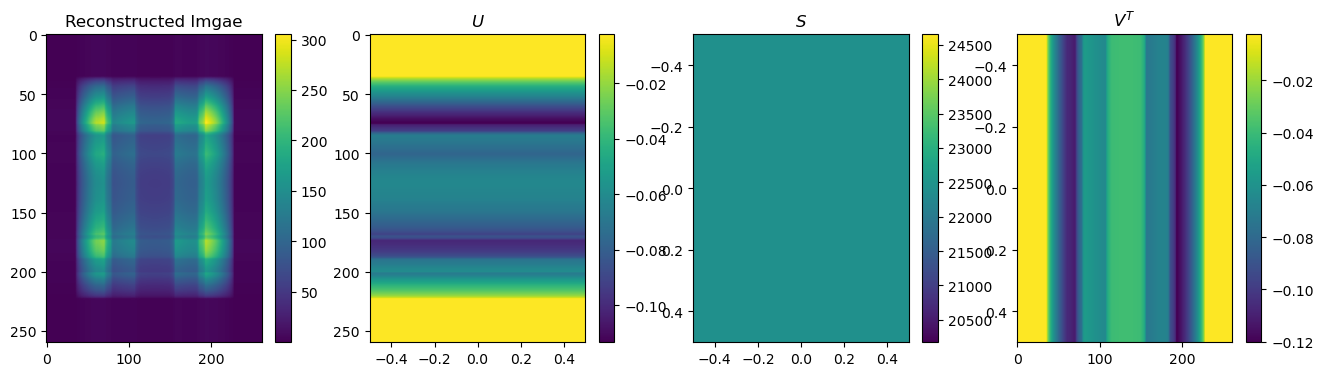

<Figure size 640x480 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

n =  2


<Figure size 640x480 with 0 Axes>

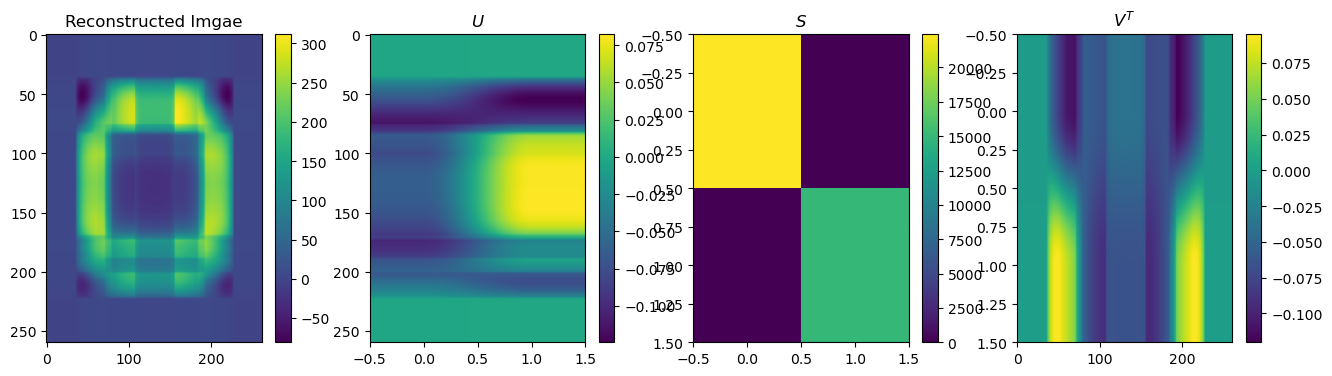

<Figure size 640x480 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

n =  3


<Figure size 640x480 with 0 Axes>

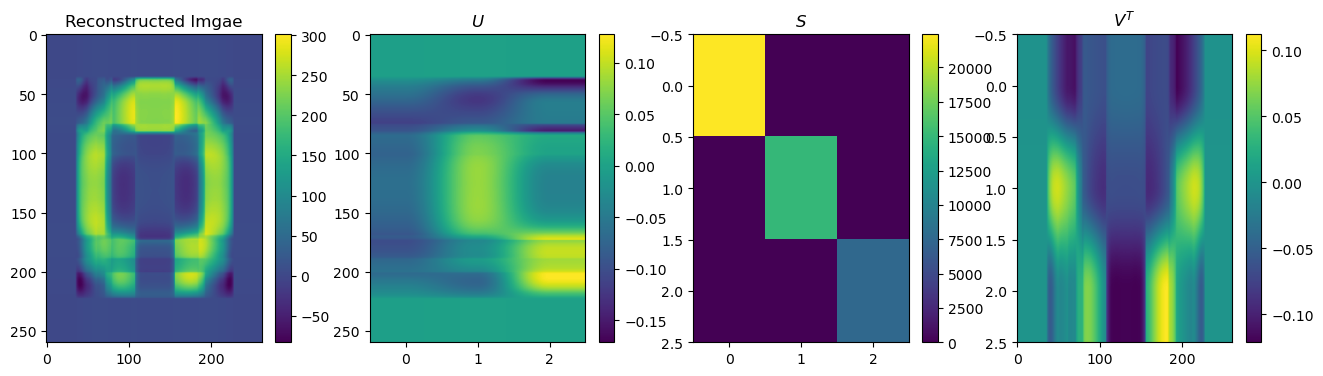

<Figure size 640x480 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

n =  4


<Figure size 640x480 with 0 Axes>

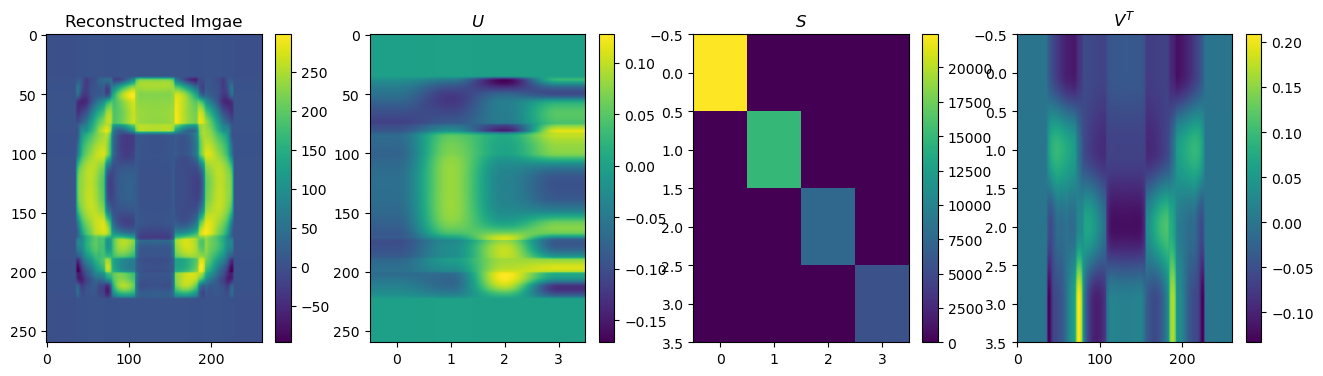

<Figure size 640x480 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

n =  5


<Figure size 640x480 with 0 Axes>

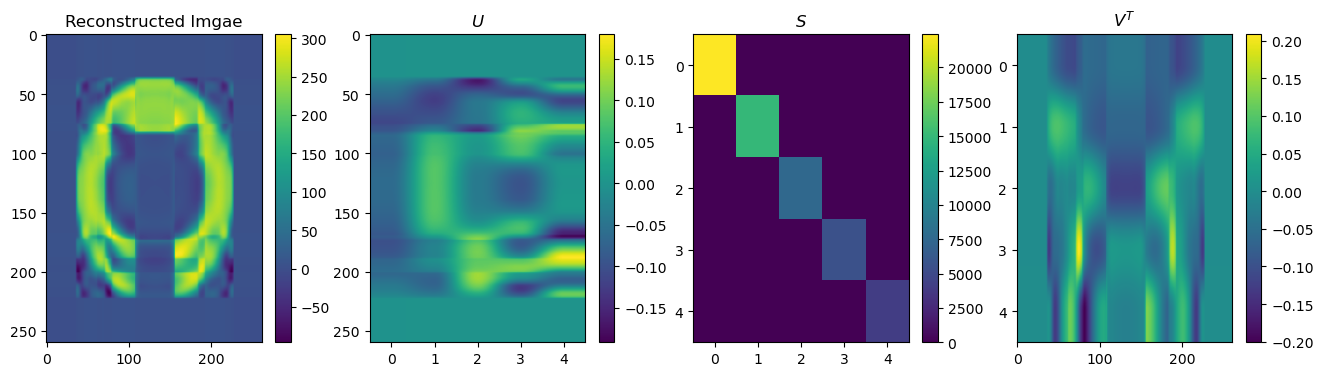

<Figure size 640x480 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

n =  50


<Figure size 640x480 with 0 Axes>

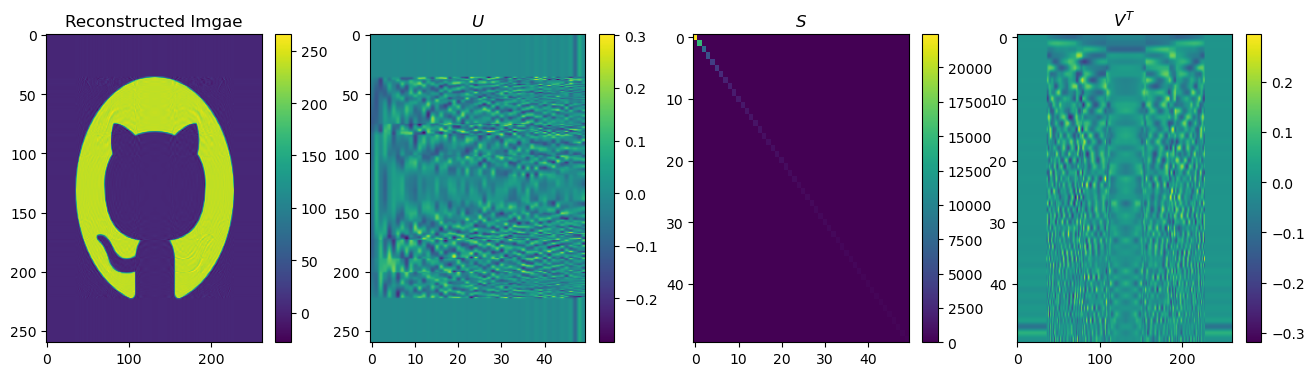

<Figure size 640x480 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

n =  100


<Figure size 640x480 with 0 Axes>

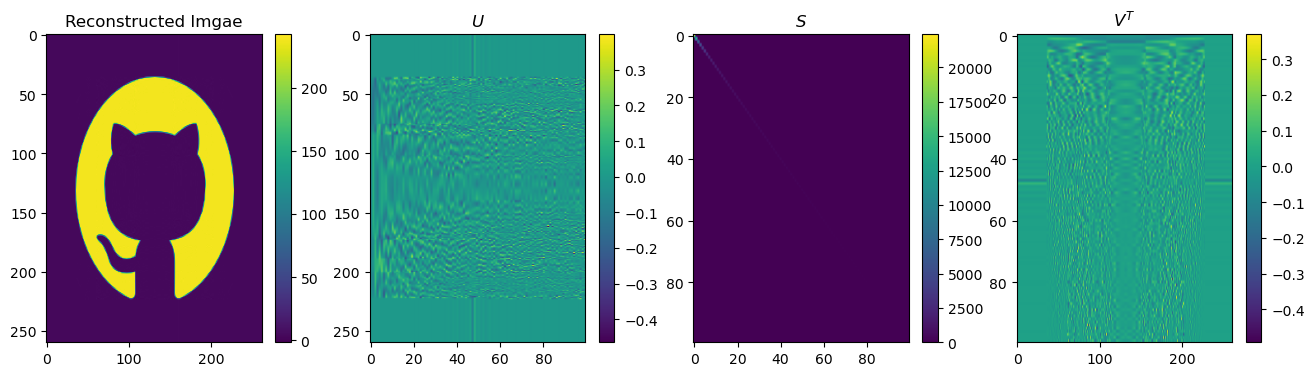

<Figure size 640x480 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

n =  150


<Figure size 640x480 with 0 Axes>

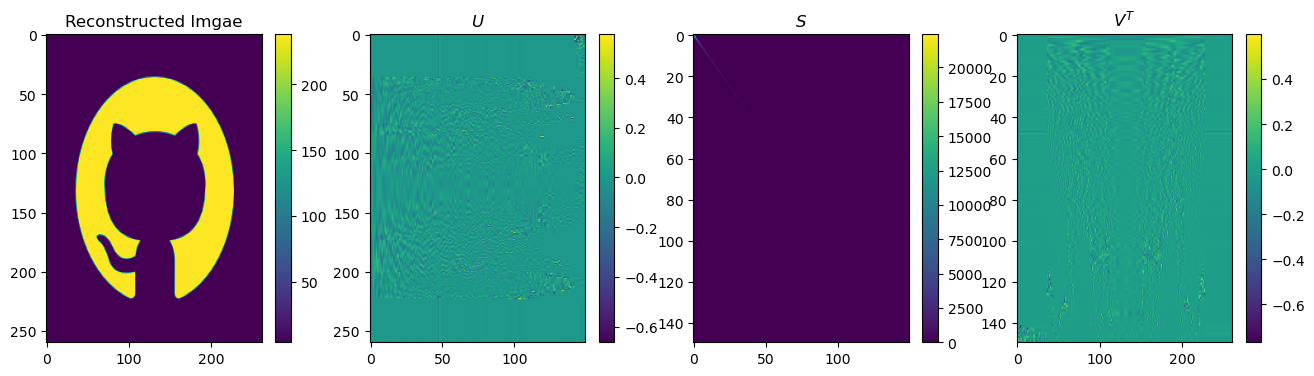

<Figure size 640x480 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

n =  200


<Figure size 640x480 with 0 Axes>

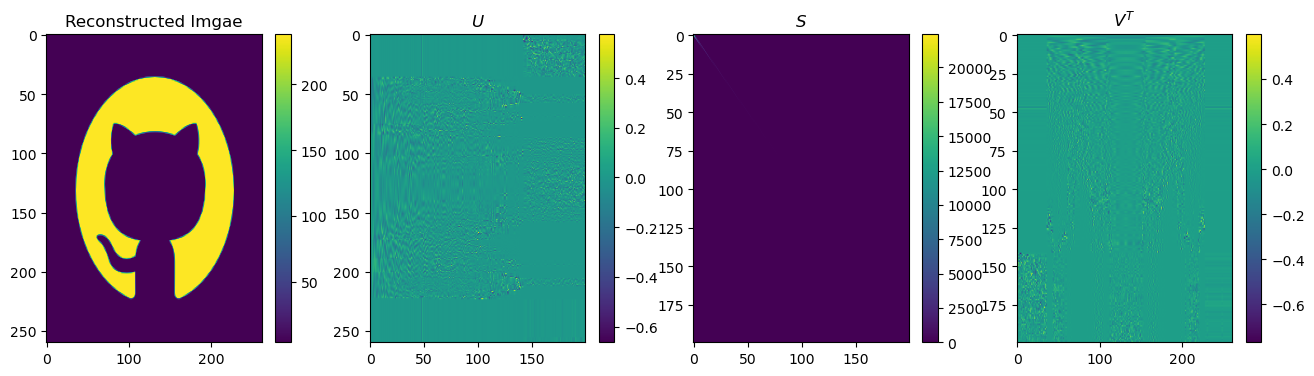

<Figure size 640x480 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

n =  250


<Figure size 640x480 with 0 Axes>

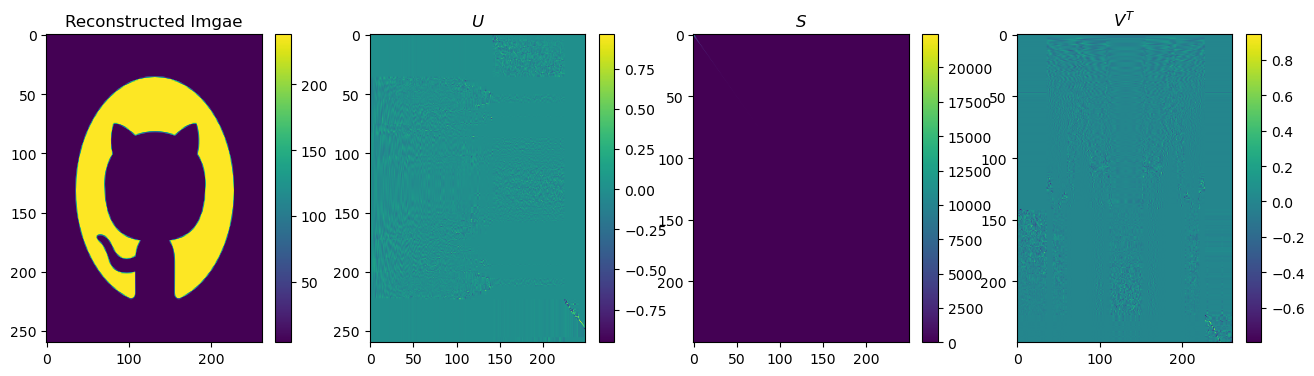

<Figure size 640x480 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

In [7]:
# compute sum
A_sum = U@S@V_T

#truncate sum
mean_error = []

M = len(A)
N = len(A[0])
#truncate matrices
for n in range(1, N+1, 1):
    #truncate
    U_trunc = U[:, :n]
    S_trunc = S[:n, :n]
    V_trunc = V_T[:n, :]
    #plot components 
    if n<6:
        print('n = ', n)
        image_reconstruct = U_trunc@S_trunc@V_trunc
        plot_matrices([image_reconstruct, U_trunc, S_trunc, V_trunc], titles=["Reconstructed Imgae", r"$U$", r"$S$", r"$V^T$"])
        #error  = np.mean(np.abs(A - A_sum_trunc))
        #mean_error.append(error)
    elif n>6:
        if n%50==0:
            print('n = ', n)
            #print('Matrix components U, S, V^{T}')
            image_reconstruct = U_trunc@S_trunc@V_trunc
            plot_matrices([image_reconstruct, U_trunc, S_trunc, V_trunc], titles=["Reconstructed Imgae", r"$U$", r"$S$", r"$V^T$"])
           


From the plots above, the smallest n valye that gives a reasonable reproduction of the image is n=4, as most details are already seen with rough edges. 

**How much data do you need to store to be able to reproduce this rank-n
 approximation of the image?**
 
 To find this, compute the size of the truncated matrices at n=4. 
 
**What is the compression factor compared to the original image?**

In [8]:
#size of component matrices in bytes
U_trunc_size = U[:, :4].size * U.itemsize 
S_trunc_size = S[:4, :4].size * S.itemsize 
V_trunc_size = V_T[:4, :].size * V_T.itemsize

#size of reconstructed image at n=4 
image_approx_size = U_trunc_size + S_trunc_size + V_trunc_size
orig_image_size = A.size * A.itemsize

print(f"Total Size of Original image: {orig_image_size} bytes")
print(f"Total Size of Rank-4 Approximation: {image_approx_size} bytes")
print(f"Compression Factor: {orig_image_size/image_approx_size}")

Total Size of Original image: 68120 bytes
Total Size of Rank-4 Approximation: 16832 bytes
Compression Factor: 4.047053231939164


This makes sense! Since we choose to represent the original image with a rank-4 approximation, the compression factor is approximately 4. This means that the data you need to store to represent the rank-4 approximaton is about **one-fourth** of the data needed to store the origjnal image. 

## 2. Fitting Planetary Orbits

### (a) Lavenberg-Maquardt to find best fit parameters

Text(0, 0.5, 'Radial velocity')

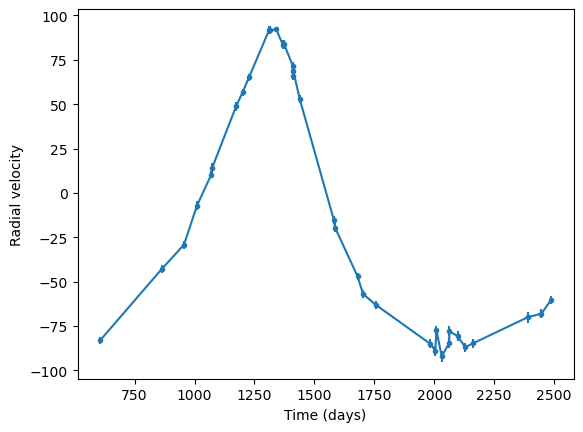

In [9]:
#Use this function to generate radial velocity data

def rv(t, P, x):
    # Calculates the radial velocity of a star orbited by a planet
    # at the times in the vector t
    
    # extract the orbit parameters
    # P, t and tp in days, mp in Jupiter masses, v0 in m/s  
    mp, e, omega, tp, v0 = x
        
    # mean anomaly
    M = 2*np.pi * (t-tp) / P
    
    # velocity amplitude
    K = 204 * P**(-1/3) * mp  / np.sqrt(1.0-(e*e)) # m/s
    
    # solve Kepler's equation for the eccentric anomaly E - e * np.sin(E) = M
    # Iterative method from Heintz DW, "Double stars", Reidel, 1978
    # first guess
    E = M + e*np.sin(M)  + ((e**2)*np.sin(2*M)/2)
    while True:
        E0 = E 
        M0 = E0 - e*np.sin(E0)
        E = E0 + (M-M0)/(1.0 - e*np.cos(E0))
        if np.max(np.abs((E-E0))) < 1e-6:
            break
        
    # evaluate the velocities
    theta = 2.0 * np.arctan( np.sqrt((1+e)/(1-e)) * np.tan(E/2))
    vel = v0 + K * ( np.cos(theta + omega) + e * np.cos(omega))
    
    return vel

#generate some data
#t = np.linspace(0,12,num=100)
#y = rv(t, 5.0, [1.0, 0.2, 0.5, 1.1, 1.3]) 
#add some noise
#y = y + 0.5* np.random.normal(size = 100)

#plot
#plt.plot(t, y, '.')
#plt.xlabel('Time (days)')
#plt.ylabel('Radial velocity')

#Observations
tobs, vobs, eobs = np.loadtxt('rvs.txt', unpack=True)
y = vobs
t = tobs
sigma = eobs
plt.errorbar(tobs, vobs, eobs, marker='.')
plt.xlabel('Time (days)')
plt.ylabel('Radial velocity')

In [81]:
def func_and_jacobian(t, P, x, sigma, finite_difference=True):
    '''Calculate the radial velocity function
       and the derivatives with respect to every parameter to populate
       the Jacobian matrix. '''
    #P = params[0]
    #x = params[1:]
    v = rv(t, P, x)
    #Jac = np.zeros([len(t), len(x)])
    
    if finite_difference:
        Jac = np.zeros([len(t), len(x)])
        eps = 1e-8
        #perturbed_P = P * (1+eps)
        #deriv_P = (rv(t, perturbed_P, x) - v)/(perturbed_P-P)
        #Jac[:,0] = deriv_P / (perturbed_P-P)
        
        #MIGHT BE MISSING 1/SIGMA FACTOR -> LOOK AT SLIDES
        for i in range(len(x)):
            perturbed_x = x.copy()
            perturbed_x[i] = x[i] * (1+eps)
            #print((rv(t, P, perturbed_x) - v)/(perturbed_x[i]-x[i]))
            Jac[:, i] = sigma*((rv(t, P, perturbed_x) - v)/(perturbed_x[i]-x[i]))
                
    #else: #compute analytical derivatives
        #Jac[:,0]
        #Jac[:,1] 
        #Jac[:,2] 
        #Jac[:,3] 
        #jac[:,4] 

    return v, Jac


# Levenberg-Marquardt method

#keep period constant
P = 1724. #days

#initial guesses
param_names = ['mp', 'e', 'omega', 'tp', 'v0']
params_guess = [1.0, 0.5, 1., 1., 1.]


chisq1 = 1.0
chisq = 1e99
lam = 1e-3

#run while chi-squared decreases
while chisq > 1e-6:
    #update parameters 
    f, A = func_and_jacobian(t, P, params_guess, sigma)
    r = (y - f)/sigma 
    chisq = np.sum(r**2)
    lhs = A.T@A
    #print(A)
    lhs = lhs@(np.identity(len(params_guess))*(1+lam))
    rhs = A.T@r
    da = np.linalg.inv(lhs)@rhs
    #calculate chi-squared associated with new parameters
    #P_guess1 = P_guess + da
    
    #do not take a FULL Newton step
    alpha = 0.4
    params_guess1 = params_guess + alpha*da
    
    f1, A1 = func_and_jacobian(t, P, params_guess1, sigma)
    r1 = (y - f1)/sigma
    chisq1 = np.sum(r1**2)
    
    #print("chisq = %lg, params=(%lg, %lg, %lg, %lg, %lg), lam = %lg" % 
     #     (chisq1 ,params_guess1[0], params_guess1[1], params_guess1[2], params_guess1[3], params_guess1[4], lam))
    
    #accept if chisq decreases, reject if it increases
    if chisq1 > chisq:
        lam = lam*10
    else:
        lam = lam/10
        #P_guess = P_guess1
        params_guess = params_guess1
        #if the impriement in chisq is too small -> exit
        if chisq-chisq1 < 1e-3:
            break


In [82]:
print("Best-fit parameters are: ", '\n')
for i in range(5):
    print(param_names[i], ' = ', params_guess[i])

Best-fit parameters are:  

mp  =  4.8426402489884035
e  =  0.36258269115607833
omega  =  0.25904059272603913
tp  =  -370.75025786165816
v0  =  -28.290808545225147


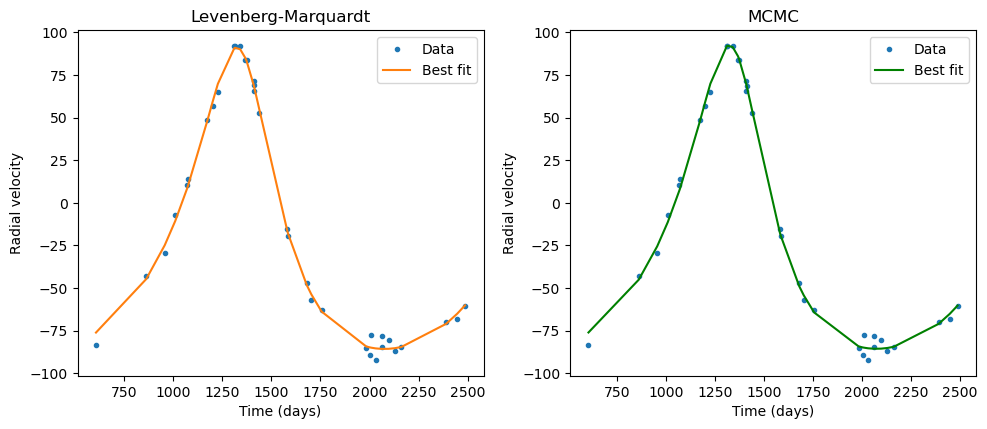

In [63]:
#taking best fit parameters given by MCMC method done in class
MCMC_best_params = [4.86, 0.37, 0.26, -370.36, -28.44]

plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
plt.plot(t, y, '.', label='Data')
plt.plot(t, rv(t, P, params_guess), label='Best fit')
plt.title('Levenberg-Marquardt')
plt.xlabel('Time (days)')
plt.ylabel('Radial velocity')
plt.legend()
#plt.show()

plt.subplot(2, 2, 2)
plt.plot(t, y, '.', label='Data')
plt.plot(t, rv(t, P, MCMC_best_params), label='Best fit', color='green')
plt.xlabel('Time (days)')
plt.ylabel('Radial velocity')
plt.title('MCMC')
plt.legend()
plt.tight_layout()

In [25]:
# compare with results found using MCMC
print('Difference in best fit parameters: ', '\n')

for i in range(5):
    print(param_names[i], ' = ', abs(MCMC_best_params[i] - params_guess[i]))

Difference in best fit parameters:  

mp  =  0.017359751990961847
e  =  0.007417308723001281
omega  =  0.0009594056625406022
tp  =  0.3902575080450106
v0  =  0.1491914529522873


In general, the difference between the best fit parameters found by both methods is very small. 

Something I noticed for tp is that depending on the initial guesses, the sign of tp might vary between negative and positive. If the parameters are opposite sign, the difference is much larger. However, magnitudes are nonetheless always similar. 

### (b) Covariance matrix

In [67]:
C = np.linalg.inv(A.T@A)
A_MCMC = func_and_jacobian(t, P, MCMC_best_params, sigma)[1]
C_MCMC = np.linalg.inv(A_MCMC.T@A_MCMC)

print('Covariance matrix for Levenberg-Marquardt method: ', '\n')
print(C, '\n')
print('Covariance matrix for MCMC method: ', '\n')
print(C_MCMC)


Covariance matrix for Levenberg-Marquardt method:  

[[ 2.88005882e-05 -5.65435769e-08 -4.25789803e-06 -1.10727891e-03
  -2.14513810e-05]
 [-5.65435769e-08  1.11847294e-06 -1.49401823e-07 -9.20961484e-05
  -2.11998069e-05]
 [-4.25789803e-06 -1.49401823e-07  1.38048298e-05  2.77058757e-03
  -3.04153660e-06]
 [-1.10727891e-03 -9.20961484e-05  2.77058757e-03  6.39086068e-01
  -6.00945843e-04]
 [-2.14513810e-05 -2.11998069e-05 -3.04153660e-06 -6.00945843e-04
   5.32531078e-03]] 

Covariance matrix for MCMC method:  

[[ 2.88211058e-05 -7.07697167e-08 -4.15701218e-06 -1.07831835e-03
  -2.15912391e-05]
 [-7.07697167e-08  1.10106541e-06 -1.33802921e-07 -8.73110648e-05
  -2.09260495e-05]
 [-4.15701218e-06 -1.33802921e-07  1.31128216e-05  2.59646904e-03
  -3.83936700e-06]
 [-1.07831835e-03 -8.73110648e-05  2.59646904e-03  5.94599629e-01
  -7.76657712e-04]
 [-2.15912391e-05 -2.09260495e-05 -3.83936700e-06 -7.76657712e-04
   5.32426200e-03]]


To compare these two matrices, we can:
1. Take the difference


In [68]:
print(abs(C_MCMC - C))

[[2.05176657e-08 1.42261397e-08 1.00885853e-07 2.89605579e-05
  1.39858140e-07]
 [1.42261397e-08 1.74075307e-08 1.55989028e-08 4.78508361e-06
  2.73757411e-07]
 [1.00885853e-07 1.55989028e-08 6.92008149e-07 1.74118533e-04
  7.97830402e-07]
 [2.89605579e-05 4.78508361e-06 1.74118533e-04 4.44864388e-02
  1.75711868e-04]
 [1.39858140e-07 2.73757411e-07 7.97830402e-07 1.75711868e-04
  1.04878093e-06]]


The difference in the covariant matrices is generally small with the largest difference in parameter correlation being in the order of $10^{-2}$.

2. Consider the diagonal entries which are the error in the best fit parameters

In [83]:
print('Best fit parameters Levenberg-Marquardt method: ', '\n')
for i in range(5):
    print(param_names[i], ' = ', params_guess[i], ' ± ', C[i][i])
    
print('\n')
print('Best fit parameters MCMC method: ', '\n')
for i in range(5):
    print(param_names[i], ' = ', MCMC_best_params[i], ' ± ', C_MCMC[i][i])

Best fit parameters Levenberg-Marquardt method:  

mp  =  4.8426402489884035  ±  2.880058815821694e-05
e  =  0.36258269115607833  ±  1.1184729367722624e-06
omega  =  0.25904059272603913  ±  1.3804829776048884e-05
tp  =  -370.75025786165816  ±  0.6390860677698783
v0  =  -28.290808545225147  ±  0.0053253107841394745


Best fit parameters MCMC method:  

mp  =  4.86  ±  0.00536852920490436
e  =  0.37  ±  0.0010493166376542924
omega  =  0.26  ±  0.0036211630213389867
tp  =  -370.36  ±  0.7711028653511222
v0  =  -28.44  ±  0.07296754075071189


Both the estimation of the parameters and the errors are significantly similar between the two methods. I did notice that the errors might differ slightly depending on the initial guesses given. 